# <CENTER><u> Heart Disease Key Factor ANALYSIS </CENTER> </u>

### Dataset - I have took 2 datasets one have the general daily routine of people and other contains the biological information of the people which describes the existance of heart disease.
### Aim : The aim of the project is to analyse the people behaviour who suffer from heart disease and who are not effeced by heart disease. 
### Procedure : I tried analysing the data by defining five functions. The following four functions will help in analysing the data as per the requirement
1. analysing_general_bilogical_relation(general_df,biological_df)            
2. thal_avg_over_sex_for_diseased(biological_df)
3. bmi_chol_over_sex(general_df, biological_df)
4. analysing_health_sleeping_pattern(general_df)

### Apart from these 4 functions, there is wrapper function that will call the preiously declared functions based on the given input

Note: The basic requirements for the project as per ruberic are satisfied within the functions 

## Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

#### Loading the Dataframes

In [2]:
# Loadding the datasets.

## The heart_diseases.parquet contains the general information like smoking, alcohol, sex, sleeping time, asthama, etc
disease_general_df=pd.read_csv('heart_diseases.csv')

## The heart.csv contains the biological information related to blood pressure, cholestrol, thal_expanision, etc
disease_biological_df=pd.read_excel('heart.xlsx')


# Defining the required functions for the analysis

In [3]:
def analysing_general_bilogical_relation(disease_general_df,disease_biological_df):
    '''
    This function will accept 2 parameters
    disease_general_df : The dataframe that contains the daily routine information of people
    disease_biological_df : The dataframe that contains the bilogical records of people
    
    Definition : It will produce the heat correlation map of the bilogical and daily routine 
    factors that are impactng the heart disease of person
    '''
    
    # Copying the data to maintain the main_data intact
    general_df=disease_general_df.copy()
    biological_df=disease_biological_df.copy()
    
    # Pivoting the general_df by indexing the HeartDisease and Sex
    disease_data=general_df.pivot_table(index=['HeartDisease','Sex']).reset_index()

    # Renaming the data
    biological_df.rename(columns={'target':'HeartDisease','sex':'Sex'},inplace=True)
    
    # Transforming the HeartDisease and Sex values in the dataframe
    biological_df.HeartDisease.replace({1:"Yes",0:"No"}, inplace= True)
    biological_df.Sex.replace({1:"Male",0:"Female"}, inplace= True)
    
    # Pivoting the bological data by taking values - trestbps, chol,thalach, oldpeak which are 
    # indexed over HeartDisease and Sex
    biological_df_filt=biological_df.pivot_table(index=['HeartDisease','Sex'],values=['trestbps','chol','thalach','oldpeak']).reset_index()

    # Attaching the bilogical attributes to the diseases data
    complete_df=disease_data.merge(biological_df_filt,on=['HeartDisease','Sex'],how='inner')
    
    # Transforming HeartDisease and Sex to numerical type to find the correlation
    complete_df.HeartDisease.replace({"Yes":1,"No":0}, inplace= True)
    complete_df.Sex.replace({"Male":1,"Female":0}, inplace= True)
    
    # Plotting the correlation heatmap
    plt.rc('figure',figsize=(18,9))
    sns.heatmap(complete_df.corr(), annot=True)
    

In [4]:
def thal_avg_over_sex_for_diseased(disease_biological_df):
    '''
    This function will accept 1 parameters
    disease_biological_df : The dataframe that contains the bilogical records of people
    
    Definition : It will return dataframe that contains the average thal rate over thal and column sex for 
    the diseased people
    '''
    
    # Copying the data to maintain the main_data intact
    df=disease_biological_df.copy()
    df['thal']=np.where(df.thal==0,'normal',np.where(df.thal==1,'fixed defect','reversable defect'))
    df.sex.replace({1:"Male",0:"Female"}, inplace= True)

    # Filtering the data who have cardio disease
    data_filt = df[df['target']==1].drop_duplicates().reset_index(0,drop=True)

    # Pivoting and transforming the thalach columns mean value 
    presummary = data_filt.pivot_table(index='thal', columns='sex', values='thalach', aggfunc=np.mean,fill_value=0)
    return presummary


In [5]:
def bmi_chol_over_sex(disease_general_df, disease_biological_df):
    '''
    This function will accept 2 parameters
    disease_general_df : The dataframe that contains the daily routine information of people
    disease_biological_df : The dataframe that contains the bilogical records of people
    
    Definition : It will return the dataframe with cholestrol and BMI values over sex 
    for both diseased and not diseased people
    '''
    
    # Copying the data to maintain the main_data intact
    general_df=disease_general_df.copy()
    biological_df=disease_biological_df.copy()
    
    # Renaming the column
    general_df.rename(columns={'Sex':'sex'},inplace=True)
    BMI_df = general_df.pivot_table(index='sex',values='BMI').reset_index()
    
    biological_df.sex.replace({1:"Male",0:"Female"}, inplace= True)
    thalach_df=biological_df.pivot_table(index='sex', values='chol').reset_index()

    bmi_chol = thalach_df.merge(BMI_df,how='inner',on=['sex'])
    return bmi_chol

In [6]:
def analysing_health_sleeping_pattern(disease_general_df):
    '''
    This function will accept one parameters
    disease_general_df : The dataframe that contains the daily routine information of people
    
    Definition : It will returns two plots one bar plot and other line plot that describes sleeping time across 
    different age groups over the GenHeatlth for the healthy people who are not effected by heart disease.
    '''
    
    # Copying the data to maintain the main_data intact
    general_df=disease_general_df.copy()
    
    # Filtering data who are not are not prone to heart diseases 
    df_1_filt = general_df[general_df['HeartDisease']=='No']
    
    # Transformation on GenHealth,AgeCategory and calculating mean of Sleeptime
    final_dt = df_1_filt.groupby(['GenHealth','AgeCategory'], as_index=False)['SleepTime'].mean() 

    plt.rc('figure',figsize=(18,9))
    plt.bar(final_dt.AgeCategory, final_dt.SleepTime, color ='blue',width = 0.5)
    plt.bar(final_dt.GenHealth, final_dt.SleepTime, color ='green',width = 0.5)

    final_dt = final_dt.pivot(index='GenHealth', columns='AgeCategory')
    plt.rc('figure',figsize=(18,9))
    final_dt.plot()
    

In [7]:
# Wrapper function that will call all the function as per the requirement analysis

In [8]:
def heart_diseases_analysis_wrapper(disease_general_df,disease_biological_df):
    '''
    This function will accept two parameters
    disease_general_df : The dataframe that contains the daily routine information of people
    
    Definition : It will returns the results of the called based function based on the user input. 
    It is the wrapper function that calls previously defined function 
    '''
    
    general_df=disease_general_df.copy()
    biological_df=disease_biological_df.copy()
    print ('\tWELCOME TO HEART DISEASES ANALYSIS\n')
    print('1. Analysing the healthy sleeping hours mean over different age and health status')
    print('2. Analysing the BMI and Cholestrol average over Sex by mean ')
    print('3. Thal avaerage estimation over sex who are diseased')
    print('4. Analysing correlation between general and biological heart diseases rate ')
    val=int(input('Select the below options to listed to analyse the heart disease data (Give number 1-4)'))

    if val==1:
        analysing_general_bilogical_relation(general_df,biological_df)            
    elif val==3:
        res=thal_avg_over_sex_for_diseased(biological_df)
        res=print(res)
    elif val==2:
        res=bmi_chol_over_sex(general_df, biological_df)
        print(res)
    elif val==4:
        analysing_health_sleeping_pattern(general_df)
    else:
        raise Exception('The code is terminated as the value entered is invalid')
        

	WELCOME TO HEART DISEASES ANALYSIS

1. Analysing the healthy sleeping hours mean over different age and health status
2. Analysing the BMI and Cholestrol average over Sex by mean 
3. Thal avaerage estimation over sex who are diseased
4. Analysing correlation between general and biological heart diseases rate 


Select the below options to listed to analyse the heart disease data (Give number 1-4) 1


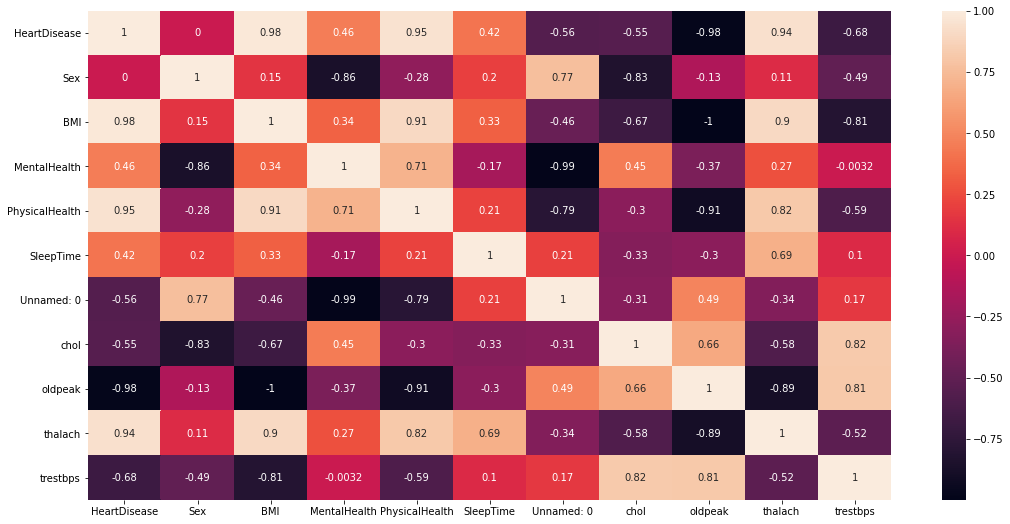

In [9]:
# Analysing the healthy sleeping hours mean over different age and health status
heart_diseases_analysis_wrapper(disease_general_df,disease_biological_df)

<b>The target variable variable HeartDisease have good positive correlation with BMI, PhysicalHealth, thlach. It have strong negative correlation with oldpek,tresbps. With outher attributes it has moderate relation. </b>

In [10]:
# Analysing the BMI and Cholestrol average over Sex by mean 
heart_diseases_analysis_wrapper(disease_general_df,disease_biological_df)

	WELCOME TO HEART DISEASES ANALYSIS

1. Analysing the healthy sleeping hours mean over different age and health status
2. Analysing the BMI and Cholestrol average over Sex by mean 
3. Thal avaerage estimation over sex who are diseased
4. Analysing correlation between general and biological heart diseases rate 


Select the below options to listed to analyse the heart disease data (Give number 1-4) 2


      sex        chol        BMI
0  Female  261.455128  28.162436
1    Male  239.237027  28.505317


<b>The average BMI value of bothe male and female are same whereas their cholertrol value are different. The cholestrol of male is less than female. </b>

In [11]:
# Checking the excpetion condition 
heart_diseases_analysis_wrapper(disease_general_df,disease_biological_df)

	WELCOME TO HEART DISEASES ANALYSIS

1. Analysing the healthy sleeping hours mean over different age and health status
2. Analysing the BMI and Cholestrol average over Sex by mean 
3. Thal avaerage estimation over sex who are diseased
4. Analysing correlation between general and biological heart diseases rate 


Select the below options to listed to analyse the heart disease data (Give number 1-4) 3


sex                    Female        Male
thal                                     
fixed defect         0.000000  147.333333
normal             115.000000    0.000000
reversable defect  154.577465  162.790698


	WELCOME TO HEART DISEASES ANALYSIS

1. Analysing the healthy sleeping hours mean over different age and health status
2. Analysing the BMI and Cholestrol average over Sex by mean 
3. Thal avaerage estimation over sex who are diseased
4. Analysing correlation between general and biological heart diseases rate 


Select the below options to listed to analyse the heart disease data (Give number 1-4) 4


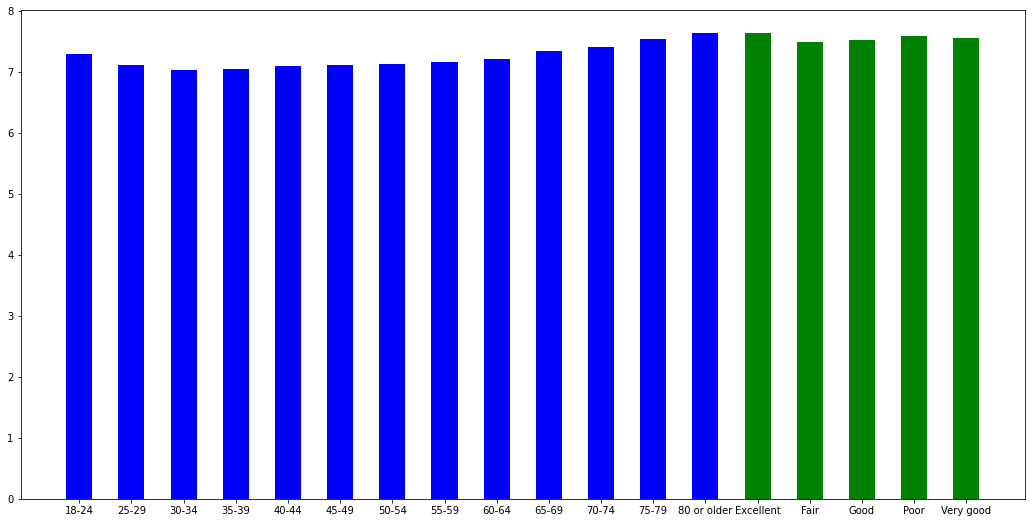

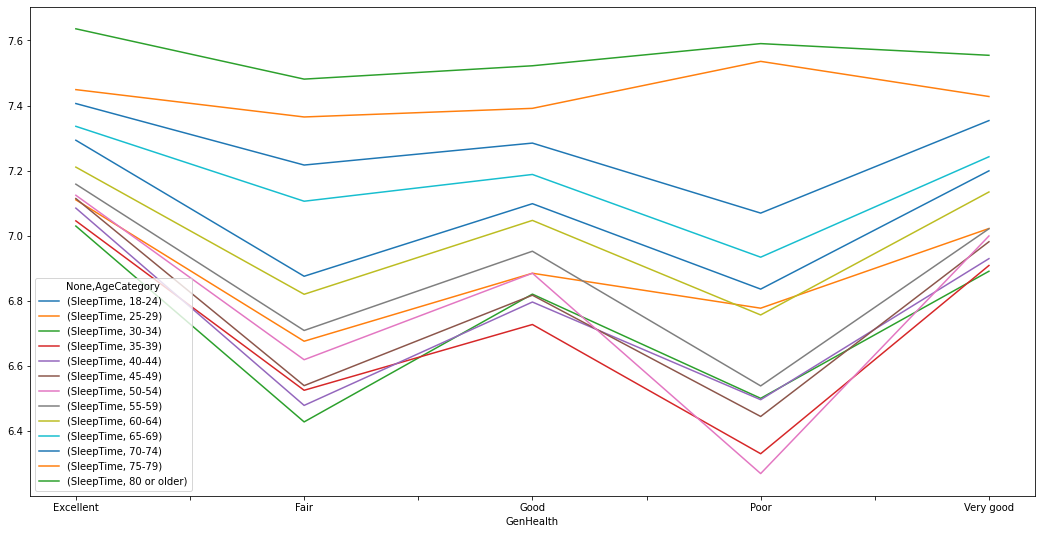

In [12]:
# Thal avaerage estimation over sex who are diseased
heart_diseases_analysis_wrapper(disease_general_df,disease_biological_df)

<b>The thal fixed defect for female and normal for male were having NaN values so, I replaced it with 0. The reversable mean is mroe fot both male and female. </b>

	WELCOME TO HEART DISEASES ANALYSIS

1. Analysing the healthy sleeping hours mean over different age and health status
2. Analysing the BMI and Cholestrol average over Sex by mean 
3. Thal avaerage estimation over sex who are diseased
4. Analysing correlation between general and biological heart diseases rate 


Select the below options to listed to analyse the heart disease data (Give number 1-4) 4


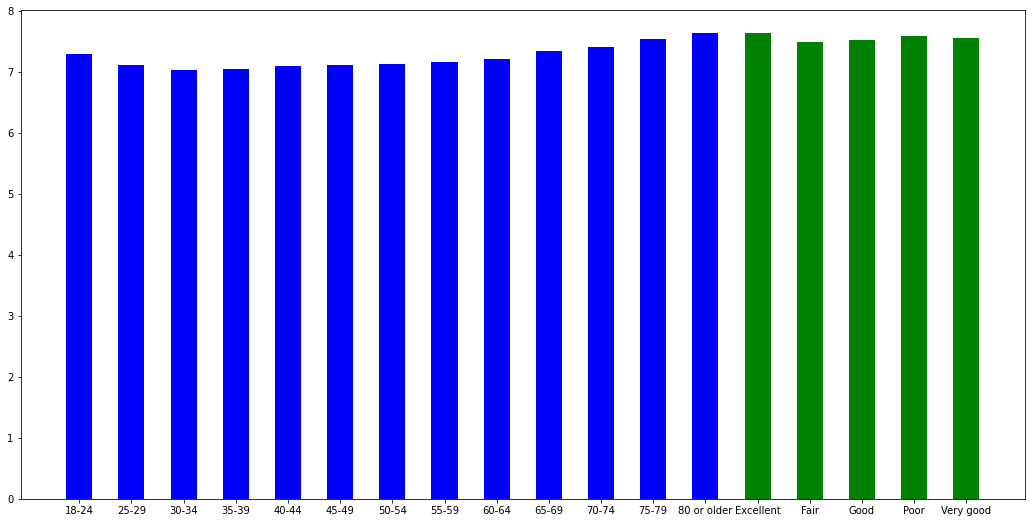

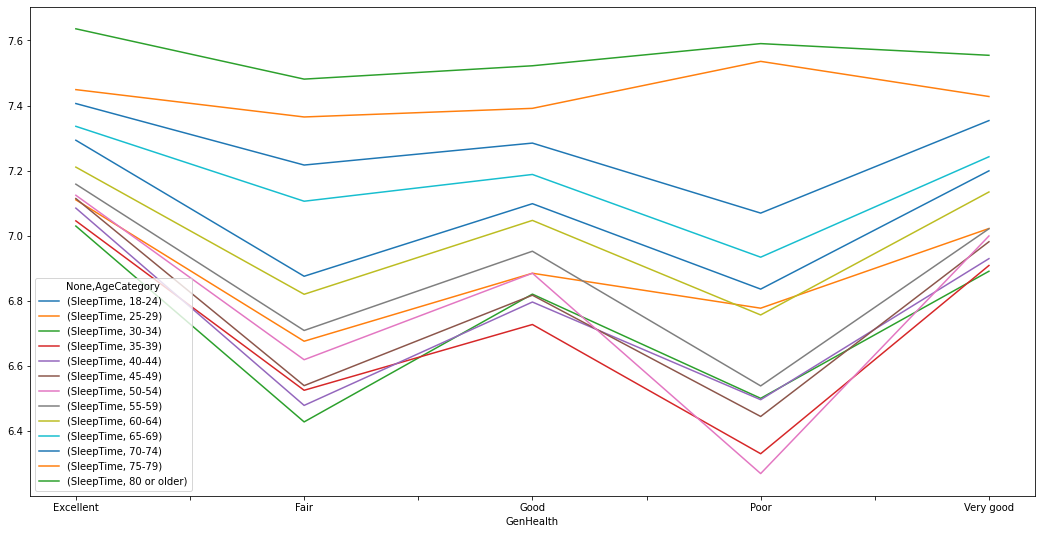

In [13]:
# Analysing correlation between general and biological heart diseases rate 
heart_diseases_analysis_wrapper(disease_general_df,disease_biological_df)

# CONCLUSION:

my conclusion is that the target variable HeartDisease have good positive correlation with BMI, PhysicalHealth, thlach. It have strong negative correlation with oldpek,tresbps. With outher attributes it has moderate relation. The average BMI value of bothe male and female are same whereas their cholertrol value are different. The cholestrol of male is less than female.


In [14]:
%%bash
git pull
git add final.ipynb
git add heart_disease.csv
git add heart.xlsx
git commit -a -m"Submitting the final project"
git push

Already up to date.
[main 6a263fd] Submitting the final project
 2 files changed, 567 insertions(+)
 create mode 100644 final/final.ipynb
 create mode 100644 final/heart.xlsx


fatal: pathspec 'heart_disease.csv' did not match any files
remote: This repository moved. Please use the new location:        
remote:   git@github.com:Kchowdary110/hds5210-2022.git        
To github.com:kchowdary110/hds5210-2022.git
   263e97e..6a263fd  main -> main
